# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

### <span style="color:darkred">Módulo I - Dados Estruturados, Não Estruturados e problemas típicos em bases de dados</span>


## <span style="color:darkred">Avaliação com soluções</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos


---

In [1]:
# carregando a biblioteca necessária
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Considere a base de dados disponível em `TACTD-01-Base.csv`. Essa base contém dados de profissionais da área da saúde incluindo: nome, sexo, ano de nascimento, religião, país e cidade de residência, número de anos de experiência (reportado pelo profissional), salário e ano do primeiro emprego (esse último é obtido subtraindo o ano de 2022 pelos anos de experiência). A cada questão, recarregue os dados para que ações realizadas numa questão não influencie nas outras.

### Questão 1)

Considere a base de dados disponível em `TACTD-01-Base.csv`. Analise o atributo 'Sex' buscando por dados incorretos, considerando que são corretos apenas 'F' e 'M' (em letras maiúsculas). Corrija os que forem possível corrigir. Após o tratamento, com relação aos dados faltantes no atributo 'Sex', i.e. linhas que não sejam 'F' nem 'M', podemos dizer que:
 
 (a) São do tipo completamente aleatório (MCAR)<br>
 ==>(b) São do tipo (condicionalmente) aleatório (MAR)<br>
 (c) São do tipo não aleatório<br>
 (d) Não há dados faltantes<br>

In [11]:
df = pd.read_csv("./dados/TACTD-01-Base.csv")

display(df[df['Sex'].isna()])
display(df[df['Sex'].isna()].shape[0])

display(df['Sex'].unique())

df.loc[df["Sex"] == 'm', "Sex"] = 'M'
df.loc[df["Sex"] == 'f', "Sex"] = 'F'
df.loc[df["Sex"] == '---', "Sex"] = np.nan

display(df[df['Sex'].isna()])
display(df[df['Sex'].isna()].shape[0])

for var in df:
    print('Coluna:', var, 'Tipo:', df[var].dtype)
    print(df[var].unique(), '\n')

,Name,Sex,Year of Birth,Country of Residency,Religion,City,Profession,Years of Experience,Salary,Year first employment
1,Alexandre Ronaldo,NaN,1980,United Arab Emirates,Christian,Dubai,Nurse,13.0,32000.5,2008.0
10,Ariel Almada,NaN,1950,Portugal,Christian,Lisbon,Nurse,45.0,47150.7,1976.0
25,Elias Elmo,NaN,1970,Portugal,Christian,Lisbon,Nurse,20.0,48244.9,2001.0
26,Elisa Cain,NaN,1984,Portugal,Christian,Lisbon,Nurse,5.0,48708.4,2016.0
71,Miriam Riley,NaN,1970,Portugal,Christian,Lisbon,Nurse,16.0,53965.6,2005.0
80,Ramon West,NaN,1984,Portugal,Christian,Lisbon,Nurse,NaN,47240.7,NaN


6

array(['M', nan, 'F', 'm', '---', 'f'], dtype=object)

,Name,Sex,Year of Birth,Country of Residency,Religion,City,Profession,Years of Experience,Salary,Year first employment
1,Alexandre Ronaldo,NaN,1980,United Arab Emirates,Christian,Dubai,Nurse,13.0,32000.5,2008.0
10,Ariel Almada,NaN,1950,Portugal,Christian,Lisbon,Nurse,45.0,47150.7,1976.0
25,Elias Elmo,NaN,1970,Portugal,Christian,Lisbon,Nurse,20.0,48244.9,2001.0
26,Elisa Cain,NaN,1984,Portugal,Christian,Lisbon,Nurse,5.0,48708.4,2016.0
34,Gabriel Paiva,NaN,1981,Portugal,Christian,Lisbon,Nurse,3.0,47973.3,2018.0
71,Miriam Riley,NaN,1970,Portugal,Christian,Lisbon,Nurse,16.0,53965.6,2005.0
80,Ramon West,NaN,1984,Portugal,Christian,Lisbon,Nurse,NaN,47240.7,NaN


7

Coluna: Name Tipo: object
['Albert Keller' 'Alexandre Ronaldo' 'Alton Thornton' 'Amelia Caldwell'
 'Andre Logan' 'Apolonia Abler' 'Archie Hogan' 'Ariel Almada'
 'Bennie Reeves' 'Bernard Summers' 'Billie Duncan' 'Brad Ferguson'
 'Carlos Cobre' 'Casey Barnes' 'David Pittman' 'Desiree Dardar'
 'Diego Colque' 'Donnie Adkins' 'Douglas Damario' 'Drew Wade'
 'Eleanore Espitia' 'Elias Elmo' 'Elisa Cain' 'Elmer Walters'
 'Eloi Fuentes' 'Erica Hudson' 'Esther Morgan' 'Eugenio Ewell'
 'Ezequiel Anthony' 'Finley Rocha' 'Gabriel Paiva' 'Hailee Ochoa'
 'Herta Hatley' 'Hubert Chapman' 'Ivo Izidro' 'Izaiah Duarte' 'Jada Judon'
 'Jameson Mendoza' 'Jane Fernandez' 'Janet Hunter' 'Jeannette Lowe'
 'Jim Foster' 'Joelle Jaffee' 'John Bradley' 'Karina Belarmino'
 'Kathey Kleiman' 'Kathy Kerrigan' 'Kayden Todd' 'Kraig Kriner'
 'Leanne Lowy' 'Lillian Labree' 'Lindsey Lever' 'Lora Lemoine'
 'Lorraine Richards' 'Magali Mattos' 'Maia Banks' 'Maique Santos'
 'Marcel Olsen' 'Marcos Magro' 'Margaret Keith' 'Mariann

---

### Questão 2)

Considere a base de dados disponível em `TACTD-01-Base.csv`, e analise os dados no atributo 'Religion' por dados incorretos. Marque como nulos/nans os incorretos não passíveis de correção. Esse atributo possui os seguintes problemas:

==> (a) 9 dados faltantes, sendo desses 5 inicialmente errôneos, nenhum corrigido<br>
 (b) 4 dados faltantes, sendo desses 4 inicialmente errôneos, 5 dados corrigidos<br>
 (c) 4 dados faltantes, sendo desses 2 inicialmente errôneos, 2 dados corrigidos<br>
 (d) 9 dados faltantes, sendo desses 4 inicialmente errôneos, 5 dados corrigidos<br>


In [16]:
df = pd.read_csv("./dados/TACTD-01-Base.csv")

display(df[df['Religion'].isna()])
display(df[df['Religion'].isna()].shape[0])

display(df['Religion'].unique())
display(df.groupby('Religion').describe())

df.loc[df["Religion"] == '----', "Religion"] = np.nan
df.loc[df["Religion"] == 'd', "Religion"] = np.nan
df.loc[df["Religion"] == '[', "Religion"] = np.nan
df.loc[df["Religion"] == '1', "Religion"] = np.nan
df.loc[df["Religion"] == 'Ac%#', "Religion"] = np.nan

display(df[df['Religion'].isna()])
display(df[df['Religion'].isna()].shape[0])


display(df['Religion'].unique())
display(df.groupby('Religion').describe())

,Name,Sex,Year of Birth,Country of Residency,Religion,City,Profession,Years of Experience,Salary,Year first employment
3,Amelia Caldwell,F,1977,Scotland,NaN,Edinburgh,Nurse,10.0,50602.8,2011.0
29,Erica Hudson,F,1980,Brazil,NaN,Santo André,Nurse,10.0,56254.8,2011.0
73,Norah Carey,F,1961,Scotland,NaN,Edinburgh,Nurse,31.0,47425.1,1990.0
81,Ricardo Rima,M,1977,Peru,NaN,Arequipa,Nurse,16.0,39000.0,2005.0


4

array(['Buddhist', 'Christian', '----', nan, 'Jew', 'd', '[', '1', 'Ac%#'],
      dtype=object)

Year of Birth                                                 \
                  count         mean       std     min     25%     50%   
Religion                                                                 
----                1.0  1984.000000       NaN  1984.0  1984.0  1984.0   
1                   1.0  1990.000000       NaN  1990.0  1990.0  1990.0   
Ac%#                1.0  2010.000000       NaN  2010.0  2010.0  2010.0   
Buddhist            5.0  1982.000000  2.828427  1979.0  1980.0  1981.0   
Christian          87.0  1975.747126  9.900926  1940.0  1968.5  1978.0   
Jew                 4.0  1975.750000  7.135592  1968.0  1971.0  1975.5   
[                   1.0  1984.000000       NaN  1984.0  1984.0  1984.0   
d                   1.0  1969.000000       NaN  1969.0  1969.0  1969.0   

                           Years of Experience             ...    Salary  \
               75%     max               count       mean  ...       75%   
Religion                                                   ...             
----       1984.00  1984.0                 1.0   3.000000  ...  50940.00   
1          1990.00  1990.0                 0.0        NaN  ...  53696.10   
Ac%#       2010.00  2010.0                 1.0   3.000000  ...  47817.80   
Buddhist   1985.00  1985.0                 5.0  10.600000  ...  58905.70   
Christian  1984.00  1990.0                79.0  15.936709  ...  54855.30   
Jew        1980.25  1984.0                 4.0  18.750000  ...  59641.15   
[          1984.00  1984.0                 1.0   4.000000  ...  59091.80   
d          1969.00  1969.0                 1.0  22.000000  ...  52494.90   

                   Year first employment                                  \
               max                 count         mean        std     min   
Religion                                                                   
----       50940.0                   1.0  2018.000000        NaN  2018.0   
1          53696.1                   0.0          NaN        NaN     NaN   
Ac%#       47817.8                   1.0  2018.000000        NaN  2018.0   
Buddhist   76000.0                   5.0  2010.400000   5.941380  2003.0   
Christian  78000.0                  78.0  2004.858974  10.239628  1975.0   
Jew        79000.0                   4.0  2002.250000  10.563301  1989.0   
[          59091.8                   1.0  2017.000000        NaN  2017.0   
d          52494.9                   1.0  1999.000000        NaN  1999.0   

                                            
              25%     50%      75%     max  
Religion                                    
----       2018.0  2018.0  2018.00  2018.0  
1             NaN     NaN      NaN     NaN  
Ac%#       2018.0  2018.0  2018.00  2018.0  
Buddhist   2006.0  2012.0  2013.00  2018.0  
Christian  2000.0  2003.5  2013.00  2020.0  
Jew        1996.5  2003.5  2009.25  2013.0  
[          2017.0  2017.0  2017.00  2017.0  
d          1999.0  1999.0  1999.00  1999.0  

[8 rows x 32 columns]

,Name,Sex,Year of Birth,Country of Residency,Religion,City,Profession,Years of Experience,Salary,Year first employment
2,Alton Thornton,M,1984,Canada,NaN,Vancouver,Nurse,3.0,50940.0,2018.0
3,Amelia Caldwell,F,1977,Scotland,NaN,Edinburgh,Nurse,10.0,50602.8,2011.0
29,Erica Hudson,F,1980,Brazil,NaN,Santo André,Nurse,10.0,56254.8,2011.0
53,Leanne Lowy,F,1969,England,NaN,Birmingham,Nurse,22.0,52494.9,1999.0
66,Marlon Moore,M,1984,Australia,NaN,Brisbane,Nurse,4.0,59091.8,2017.0
67,Marshall Vargas,M,1990,Scotland,NaN,Edinburgh,Nurse,NaN,53696.1,NaN
73,Norah Carey,F,1961,Scotland,NaN,Edinburgh,Nurse,31.0,47425.1,1990.0
81,Ricardo Rima,M,1977,Peru,NaN,Arequipa,Nurse,16.0,39000.0,2005.0
100,Zachary Yates,M,2010,England,NaN,_Dh,Nurse,3.0,47817.8,2018.0


9

array(['Buddhist', 'Christian', nan, 'Jew'], dtype=object)

Year of Birth                                                 \
                  count         mean       std     min     25%     50%   
Religion                                                                 
Buddhist            5.0  1982.000000  2.828427  1979.0  1980.0  1981.0   
Christian          87.0  1975.747126  9.900926  1940.0  1968.5  1978.0   
Jew                 4.0  1975.750000  7.135592  1968.0  1971.0  1975.5   

                           Years of Experience             ...    Salary  \
               75%     max               count       mean  ...       75%   
Religion                                                   ...             
Buddhist   1985.00  1985.0                 5.0  10.600000  ...  58905.70   
Christian  1984.00  1990.0                79.0  15.936709  ...  54855.30   
Jew        1980.25  1984.0                 4.0  18.750000  ...  59641.15   

                   Year first employment                                  \
               max                 count         mean        std     min   
Religion                                                                   
Buddhist   76000.0                   5.0  2010.400000   5.941380  2003.0   
Christian  78000.0                  78.0  2004.858974  10.239628  1975.0   
Jew        79000.0                   4.0  2002.250000  10.563301  1989.0   

                                            
              25%     50%      75%     max  
Religion                                    
Buddhist   2006.0  2012.0  2013.00  2018.0  
Christian  2000.0  2003.5  2013.00  2020.0  
Jew        1996.5  2003.5  2009.25  2013.0  

[3 rows x 32 columns]

---
### Questão 3)

Dados estruturados, quando comparados aos não-estruturados, são caracterizados por:

(a) permitir executar validação dos dados, mas não possibilitar acesso direto<br>
(b) possibilitar maior liberdade/flexibilidade na coleta dos dados, sendo ideais para coleta com baixo controle<br>
(c) armazenado em arquivos de formato texto livre, permitindo controle de versões<br>
==> (d) possuir campos e atributos que permitam endereçar diretamente os dados <br>

---

### Questão 4)

Considere a base de dados disponível em `TACTD-01-Base.csv`, e analise os dados no atributo Salary por meio do gráfico de caixa e depois visualizando as linhas contendo outliers mostrados no gráfico de caixa. 

O atributo possui:

(a) 2 outliers globais<br>
(b) 4 outliers globais<br>
(c) 5 outliers globais<br>
==> (d) 6 outliers globais<br>

,Name,Sex,Year of Birth,Country of Residency,Religion,City,Profession,Years of Experience,Salary,Year first employment
1,Alexandre Ronaldo,NaN,1980,United Arab Emirates,Christian,Dubai,Nurse,13.0,32000.5,2008.0
7,Apolonia Abler,F,1967,Canada,Christian,Vancouver,Nurse,18.0,34100.0,2003.0
101,Virgil Freeman,M,1984,United Arab Emirates,Christian,Dubai,Nurse,25.0,78000.0,1996.0
102,Michele London,F,1980,United Arab Emirates,Buddhist,Dubai,Nurse,18.0,76000.0,2003.0
103,Ricardo Alvarez,M,1990,United Arab Emirates,Christian,Dubai,Nurse,8.0,75000.0,2013.0
104,Raelynn Murphy,F,1979,United Arab Emirates,Jew,Dubai,Nurse,32.0,79000.0,1989.0


6

,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
Acapulco,7.0,53327.242857,3697.440199,46206.1,52432.95,54785.00,55421.500,56590.7
Arequipa,7.0,48212.100000,7830.875333,39000.0,42816.35,47422.90,52895.800,59637.5
Birmingham,6.0,51703.800000,4304.314656,46957.2,49752.95,50822.75,52148.825,59632.9
Brisbane,7.0,51456.214286,4881.530126,46569.3,48225.60,48587.60,54746.800,59091.8
Dubai,5.0,68000.100000,20186.406318,32000.5,75000.00,76000.00,78000.000,79000.0
Edinburgh,9.0,51642.577778,5855.711547,45478.6,47425.10,50837.70,53696.100,65000.0
Lisbon,6.0,48880.600000,2561.093971,47150.7,47423.85,48109.10,48592.525,53965.6
New Orleans,19.0,50595.257895,5290.679438,41000.0,47579.30,49000.00,54814.000,58911.8
New York,5.0,48641.280000,3081.198293,45496.4,45696.10,48778.10,50703.700,52532.1


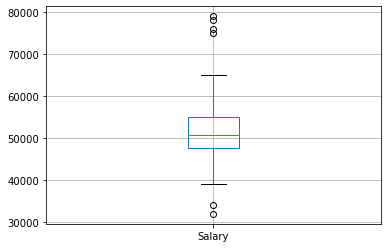

In [24]:
df = pd.read_csv("./dados/TACTD-01-Base.csv")

df.boxplot(column=["Salary"])

df_filtro = df[(df["Salary"] > 65000) | (df["Salary"] < 39000) ]
display(df_filtro)
display(df_filtro.shape[0])
display(df.groupby('City')['Salary'].describe())

## Questão 5)

Considere a base de dados disponível em `TACTD-01-Base.csv`, e busque por linhas duplicadas e atributos não informativos (redundantes/constantes). Quantas linhas duplicadas foram encontradas, e qual(is) atributo(s) pode(m) ser considerado(s) não informativo(s)?

==> (a) 1 linha duplicada; atributos não informativos: Profession<br>
(b) 1 linha duplicada; atributos não informativos: Profession e Year first employment<br>
(c) 1 linha duplicada; atributos não informativos: Year first employment<br>
(d) 2 linhas duplicadas; atributos não informativos: Profession e Year first employment<br>

In [35]:
df = pd.read_csv("./dados/TACTD-01-Base.csv")

display(df[df.duplicated()])

for var in df:
    print('\nColuna: ', var)
    print('Total Valores únicos: ', len(df[var].unique()))
    print('Valores únicos: ', df[var].unique(), '\n')



,Name,Sex,Year of Birth,Country of Residency,Religion,City,Profession,Years of Experience,Salary,Year first employment
84,Ruby Singleton,F,1982,USA,Christian,New Orleans,Nurse,7.0,41000.0,2014.0



Coluna:  Name
Total Valores únicos:  98
Valores únicos:  ['Albert Keller' 'Alexandre Ronaldo' 'Alton Thornton' 'Amelia Caldwell'
 'Andre Logan' 'Apolonia Abler' 'Archie Hogan' 'Ariel Almada'
 'Bennie Reeves' 'Bernard Summers' 'Billie Duncan' 'Brad Ferguson'
 'Carlos Cobre' 'Casey Barnes' 'David Pittman' 'Desiree Dardar'
 'Diego Colque' 'Donnie Adkins' 'Douglas Damario' 'Drew Wade'
 'Eleanore Espitia' 'Elias Elmo' 'Elisa Cain' 'Elmer Walters'
 'Eloi Fuentes' 'Erica Hudson' 'Esther Morgan' 'Eugenio Ewell'
 'Ezequiel Anthony' 'Finley Rocha' 'Gabriel Paiva' 'Hailee Ochoa'
 'Herta Hatley' 'Hubert Chapman' 'Ivo Izidro' 'Izaiah Duarte' 'Jada Judon'
 'Jameson Mendoza' 'Jane Fernandez' 'Janet Hunter' 'Jeannette Lowe'
 'Jim Foster' 'Joelle Jaffee' 'John Bradley' 'Karina Belarmino'
 'Kathey Kleiman' 'Kathy Kerrigan' 'Kayden Todd' 'Kraig Kriner'
 'Leanne Lowy' 'Lillian Labree' 'Lindsey Lever' 'Lora Lemoine'
 'Lorraine Richards' 'Magali Mattos' 'Maia Banks' 'Maique Santos'
 'Marcel Olsen' 'Marcos 